In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import ticker
import pycountry_convert as pc  
from sklearn.metrics import mean_absolute_error
from matplotlib import ticker
from scipy.stats import linregress

# Linear Regression - Train on One Country, Test on Another

In [48]:
path_train = "/Users/marth/MLProject/ML-Climate-Project/clean-data/processed_CO2_data_UK.csv"
df_train = pd.read_csv(path_train)
path_test = "/Users/marth/MLProject/ML-Climate-Project/clean-data/processed_CO2_data_Argentina.csv"
df_test = pd.read_csv(path_test)

In [32]:
def linear_coefs(X, Y):
  """
  Args:
    X: N x d matrix of input features
    Y: N x 1 matrix (column vector) of output response

  Returns:
    Beta: d x 1 matrix of linear coefficients
  """
  #Use Normal Equation (X^T*X)(beta) = (X^T * Y) to find linear coefficients
  x_tf = tf.constant(X, dtype=tf.float32)
  y_tf = tf.constant(Y, dtype=tf.float32)

  #Use Normal Equation (X^T*X)(beta) = (X^T * Y) to find linear coefficients

  XT_X = tf.matmul(tf.transpose(x_tf), x_tf)
  XT_Y = tf.matmul(tf.transpose(x_tf), y_tf)
  beta = tf.linalg.solve(XT_X, XT_Y).numpy()
  return beta 

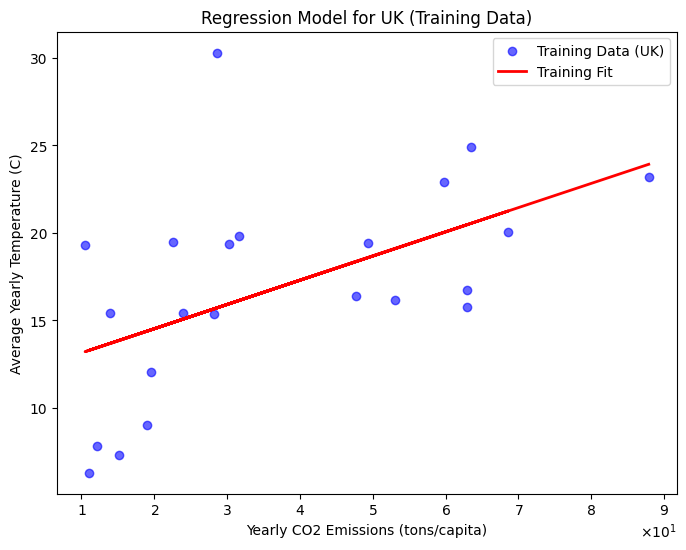

Mean Absolute Error (in Celcius): 4.48265168507894


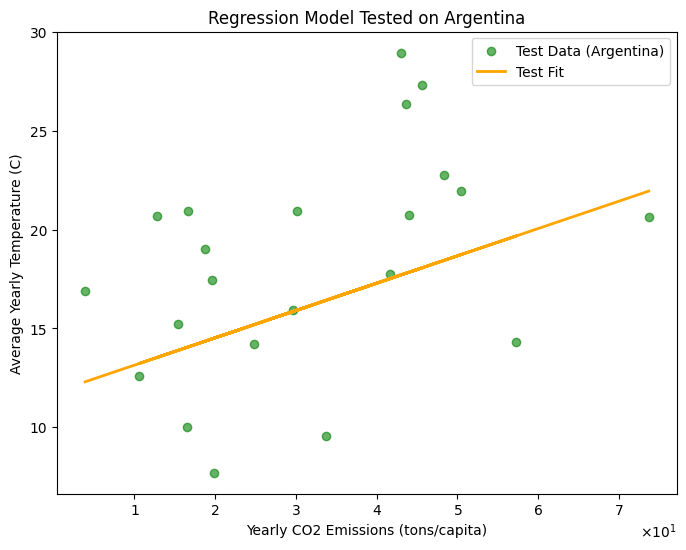

In [49]:
train_country = "UK"  # Country to train the model
test_country = "Argentina"       # Country to test the model

# TRAINING

train_data = df_train
test_data = df_test

if train_data.empty or test_data.empty:
    print(f"No data available for training ({train_country}) or testing ({test_country}).")
else:

    X_train = train_data["Total_CO2_Emissions"].values.reshape(-1, 1)  
    Y_train = train_data["Avg_Temperature"].values.reshape(-1, 1)  

    X_test = test_data["Total_CO2_Emissions"].values.reshape(-1, 1)  
    Y_test = test_data["Avg_Temperature"].values.reshape(-1, 1)  

    # generate linear coefficients on training data
    X_train_with_bias = tf.concat([tf.ones((X_train.shape[0], 1)), X_train], axis=1)
    beta_linear = linear_coefs(X_train_with_bias, Y_train)
    Y_train_pred = tf.matmul(X_train_with_bias, beta_linear)

    # compute predictions on test data
    X_test_with_bias = tf.concat([tf.ones((X_test.shape[0], 1)), X_test], axis=1)
    Y_test_pred = tf.matmul(X_test_with_bias, beta_linear)

    # plot for training data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, Y_train, label=f"Training Data ({train_country})", color="blue", alpha=0.6)
    plt.plot(X_train, Y_train_pred, label="Training Fit", color="red", linewidth=2)

    plt.ylabel("Average Yearly Temperature (C)")
    plt.xlabel("Yearly CO2 Emissions (tons/capita)")
    plt.title(f"Regression Model for {train_country} (Training Data)")
    plt.legend()

    plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    plt.gca().xaxis.get_offset_text().set_fontsize(10)  
    plt.ticklabel_format(axis="x", style="scientific", scilimits=(0, 0))

    plt.show()

# TESTING
    
    # Evaluate accuracy of predictions on the test data
    mae_test = mean_absolute_error(Y_test, Y_test_pred.numpy())
    print(f"Mean Absolute Error (in Celcius): {mae_test}")
    
    # plot for test data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, Y_test, label=f"Test Data ({test_country})", color="green", alpha=0.6)
    plt.plot(X_test, Y_test_pred, label="Test Fit", color="orange", linewidth=2)

    plt.ylabel("Average Yearly Temperature (C)")
    plt.xlabel("Yearly CO2 Emissions (tons/capita)")
    plt.title(f"Regression Model Tested on {test_country}")
    plt.legend()

    plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    plt.gca().xaxis.get_offset_text().set_fontsize(10)  
    plt.ticklabel_format(axis="x", style="scientific", scilimits=(0, 0))

    plt.show()


## Polynomial Regression

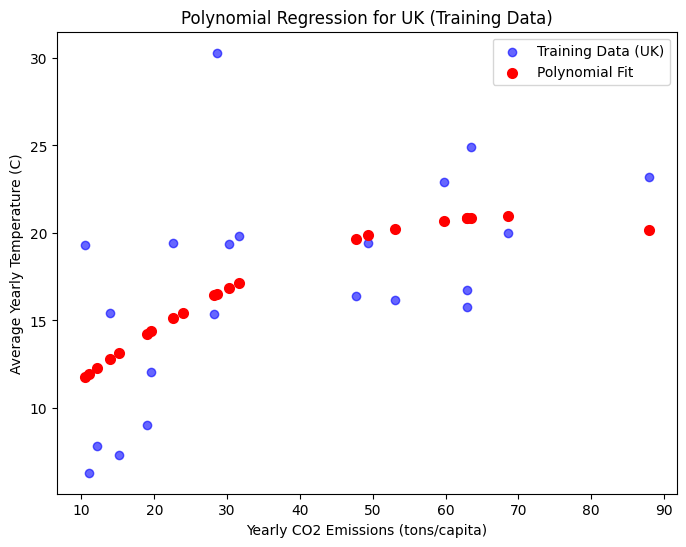

Polynomial Regression MAE (Test Data): 4.427113459277653


In [50]:
# Trying Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate polynomial features
degree = 2  # You can change the degree of the polynomial
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

# Predictions
Y_train_pred_poly = poly_model.predict(X_train_poly)
Y_test_pred_poly = poly_model.predict(X_test_poly)

# Plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train, Y_train, label=f"Training Data ({train_country})", color="blue", alpha=0.6)
plt.scatter(X_train, Y_train_pred_poly, label="Polynomial Fit", color="red", linewidth=2)

plt.ylabel("Average Yearly Temperature (C)")
plt.xlabel("Yearly CO2 Emissions (tons/capita)")
plt.title(f"Polynomial Regression for {train_country} (Training Data)")
plt.legend()
plt.show()

# Evaluate on test data
mae_test_poly = mean_absolute_error(Y_test, Y_test_pred_poly)
print(f"Polynomial Regression MAE (Test Data): {mae_test_poly}")

## Random Feature Regression

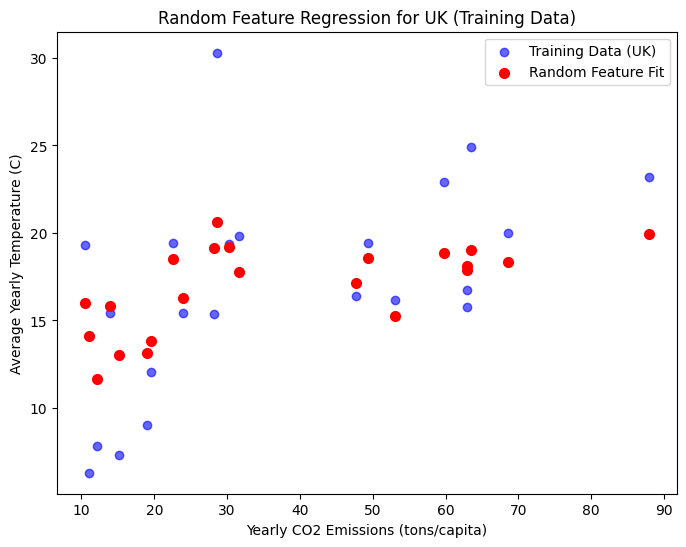

Random Feature Regression MAE (Test Data): 4.303943340481633


In [51]:
# Random Feature Regression
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge

# Generate random features
rbf_feature = RBFSampler(gamma=1, random_state=42, n_components=100)
X_train_rbf = rbf_feature.fit_transform(X_train)
X_test_rbf = rbf_feature.transform(X_test)

# Train the model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_rbf, Y_train)

# Predictions
Y_train_pred_rbf = ridge_model.predict(X_train_rbf)
Y_test_pred_rbf = ridge_model.predict(X_test_rbf)

# Plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train, Y_train, label=f"Training Data ({train_country})", color="blue", alpha=0.6)
plt.scatter(X_train, Y_train_pred_rbf, label="Random Feature Fit", color="red", linewidth=2)

plt.ylabel("Average Yearly Temperature (C)")
plt.xlabel("Yearly CO2 Emissions (tons/capita)")
plt.title(f"Random Feature Regression for {train_country} (Training Data)")
plt.legend()
plt.show()

# Evaluate on test data
mae_test_rbf = mean_absolute_error(Y_test, Y_test_pred_rbf)
print(f"Random Feature Regression MAE (Test Data): {mae_test_rbf}")